In [4]:
import struct
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import add, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from numpy import expand_dims
from src.loadweights import make_yolov3_model, WeightReader

In [2]:
# Create YOLOv3 model
model = make_yolov3_model()

# Load the weights
weight_reader = WeightReader('model/yolov3.weights')

# Set the model weights into the model
weight_reader.load_weights(model)

# Save the model to file
model.save('model/yolov3.h5')

c:\Greg-Galvin-Unique-Faces-and-Object-Identification\venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

loading weights of convolution #77
loading weights of convolution #78
loading weights of convolution #79
loading weights of convolution #80
loading weights of convolution #81
no convolution #82
no convolution #83
loading weights of convolution #84
no convolution #85
no convolution #86
loading weights of convolution #87
loading weights of convolution #88
loading weights of convolution #89
loading weights of convolution #90
loading weights of convolution #91
loading weights of convolution #92
loading weights of convolution #93
no convolution #94
no convolution #95
loading weights of convolution #96
no convolution #97
no convolution #98
loading weights of convolution #99
loading weights of convolution #100
loading weights of convolution #101
loading weights of convolution #102
loading weights of convolution #103
loading weights of convolution #104
loading weights of convolution #105


In [5]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_0 (Conv2D)     │ (None, None,      │        864 │ input_layer[0][0] │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bnorm_0             │ (None, None,      │        128 │ conv_0[0][0]      │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_0 (LeakyReLU) │ (None, None,      │          0 │ bnorm_0[0][0]     │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, None,      │          0 │ leaky_0[0][0]     │
│ (ZeroPadding2D)     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_1 (Conv2D)     │ (None, None,      │     18,432 │ zero_padding2d[0… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bnorm_1             │ (None, None,      │        256 │ conv_1[0][0]      │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_1 (LeakyReLU) │ (None, None,      │          0 │ bnorm_1[0][0]     │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_2 (Conv2D)     │ (None, None,      │      2,048 │ leaky_1[0][0]     │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bnorm_2             │ (None, None,      │        128 │ conv_2[0][0]      │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_2 (LeakyReLU) │ (None, None,      │          0 │ bnorm_2[0][0]     │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_3 (Conv2D)     │ (None, None,      │     18,432 │ leaky_2[0][0]     │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bnorm_3             │ (None, None,      │        256 │ conv_3[0][0]      │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_3 (LeakyReLU) │ (None, None,      │          0 │ bnorm_3[0][0]     │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, None,      │          0 │ leaky_1[0][0],    │
│                     │ None, 64)         │            │ leaky_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, None,      │          0 │ add[0][0]         │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_5 (Conv2D)     │ (None, None,      │     73,728 │ zero_padding2d_1

 Total params: 62,001,757 (236.52 MB)

 Trainable params: 61,949,149 (236.32 MB)

 Non-trainable params: 52,608 (205.50 KB)

In [6]:
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck",
	"boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
	"bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
	"backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
	"sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
	"tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
	"apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
	"chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse",
	"remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
	"book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]

In [7]:
IMAGE_WIDTH=416
IMAGE_HEIGHT=416
def load_and_preprocess_image(path,shape):
  image=tf.io.read_file(path)
  width,height=load_img(path).size
  image=tf.image.decode_jpeg(image,channels=3)
  image=tf.image.resize(image, shape)
  image/=255
  return image,width,height

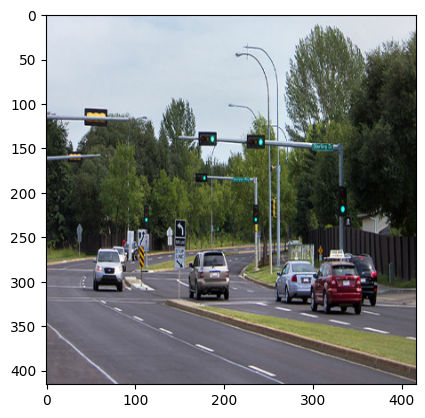

In [11]:
photo_filename='C:/Greg-Galvin-Unique-Faces-and-Object-Identification/Object_detection/images/traffic.jpg'
_image, image_w, image_h=load_and_preprocess_image(photo_filename,[IMAGE_WIDTH,IMAGE_HEIGHT])
plt.imshow(_image)

In [12]:
image = expand_dims(_image, 0)
yhat = model.predict(image)
print([a.shape for a in yhat])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]


In [13]:
# This cell is based on https://machinelearningmastery.com/how-to-perform-object-detection-with-yolov3-in-keras/
class BoundBox:
	'''
	Objects of boxes. (xmin,ymin) represents the upleft coordinate of the box while (xmax,ymax) means downright one.
	'''
	def __init__(self, xmin, ymin, xmax, ymax, objness = None, classes = None):
		self.xmin = xmin
		self.ymin = ymin
		self.xmax = xmax
		self.ymax = ymax
		self.objness = objness
		self.classes = classes
		self.label = -1
		self.score = -1
 
	def get_label(self):
		if self.label == -1:
			self.label = np.argmax(self.classes)
 
		return self.label
 
	def get_score(self):
		if self.score == -1:
			self.score = self.classes[self.get_label()]
 
		return self.score

def _sigmoid(x):
	return 1. / (1. + np.exp(-x))
 
def decode_netout(netout, anchors, net_h, net_w):
	grid_h, grid_w = netout.shape[:2]
	nb_box = 3
	netout = netout.reshape((grid_h, grid_w, nb_box, -1))
	nb_class = netout.shape[-1] - 5
	boxes = []
	netout[..., :2]  = _sigmoid(netout[..., :2])
	netout[..., 4:]  = _sigmoid(netout[..., 4:])
	netout[..., 5:]  = netout[..., 4][..., np.newaxis] * netout[..., 5:]
 
	for i in range(grid_h*grid_w):
		row = i / grid_w
		col = i % grid_w
		for b in range(nb_box):
			# 4th element is objectness score
			objectness = netout[int(row)][int(col)][b][4]
			# if(objectness.all() <= obj_thresh): continue
			# first 4 elements are x, y, w, and h
			x, y, w, h = netout[int(row)][int(col)][b][:4]
			x = (col + x) / grid_w # center position, unit: image width
			y = (row + y) / grid_h # center position, unit: image height
			w = anchors[2 * b + 0] * np.exp(w) / net_w # unit: image width
			h = anchors[2 * b + 1] * np.exp(h) / net_h # unit: image height
			# last elements are class probabilities
			classes = netout[int(row)][col][b][5:]
			box = BoundBox(x-w/2, y-h/2, x+w/2, y+h/2, objectness, classes)
			boxes.append(box)
	return boxes

In [14]:
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]
boxes = list()
for i in range(len(yhat)):
	boxes += decode_netout(yhat[i][0], anchors[i], net_h=IMAGE_HEIGHT, net_w=IMAGE_WIDTH)

for i in range(len(boxes)):
	x_offset, x_scale = (IMAGE_WIDTH - IMAGE_WIDTH)/2./IMAGE_HEIGHT, float(IMAGE_WIDTH)/IMAGE_WIDTH
	y_offset, y_scale = (IMAGE_HEIGHT - IMAGE_HEIGHT)/2./IMAGE_HEIGHT, float(IMAGE_HEIGHT)/IMAGE_HEIGHT
	boxes[i].xmin = int((boxes[i].xmin - x_offset) / x_scale * image_w)
	boxes[i].xmax = int((boxes[i].xmax - x_offset) / x_scale * image_w)
	boxes[i].ymin = int((boxes[i].ymin - y_offset) / y_scale * image_h)
	boxes[i].ymax = int((boxes[i].ymax - y_offset) / y_scale * image_h)

In [15]:
len(boxes)

10647

In [16]:
def box_filter(boxes,labels,threshold_socre):
	valid_boxes=[]
	valid_labels=[]
	valid_scores=[]
	for box in boxes:
		for i in range(len(labels)):
			if box.classes[i] > threshold_socre:
				valid_boxes.append(box)
				valid_labels.append(labels[i])
				valid_scores.append(box.classes[i])
		
	return (valid_boxes,valid_labels,valid_scores)

In [17]:
valid_data= box_filter(boxes, labels, threshold_socre=0.6)

In [18]:
def draw_boxes(filename, valid_data):

	data = pyplot.imread(filename)
	pyplot.imshow(data)
	ax = pyplot.gca()
	for i in range(len(valid_data[0])):
		box = valid_data[0][i]
		y1, x1, y2, x2 = box.ymin, box.xmin, box.ymax, box.xmax
		width, height = x2 - x1, y2 - y1
		rect = Rectangle((x1, y1), width, height, fill=False, color='white')
		ax.add_patch(rect)
		print(valid_data[1][i], valid_data[2][i])
		label = "%s (%.3f)" % (valid_data[1][i], valid_data[2][i])
		pyplot.text(x1, y1, label, color='white')
	pyplot.show()

car 0.9799808
car 0.90150267
car 0.9822434
car 0.82281226
car 0.9342798
car 0.93157935
car 0.9818445
car 0.9982241
car 0.98154813
car 0.9050933
car 0.76686263
car 0.98158306
car 0.9231703
car 0.65974057
car 0.9845722
car 0.98843783
car 0.8808287
traffic light 0.61882806
traffic light 0.75971967
traffic light 0.7020068
traffic light 0.87137073
traffic light 0.964606
traffic light 0.77623165
traffic light 0.8328068
car 0.6020883
car 0.7852914


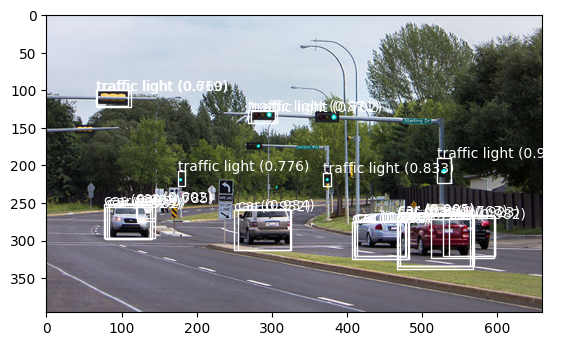

In [19]:
draw_boxes(photo_filename,valid_data)

In [20]:
def encoder_dic(valid_data):
  data_dic={}
  (valid_boxes,valid_labels,valid_scores)=valid_data
  for box, label,score in zip(valid_boxes,valid_labels,valid_scores):
    if label not in data_dic:
      data_dic[label]=[[score,box,'kept']]
    else:
      data_dic[label].append([score,box,'kept'])
      
  return data_dic
dic=encoder_dic(valid_data)

In [21]:
def decode_box_coor(box):
  return (box.xmin, box.ymin,box.xmax, box.ymax )

def iou(box1, box2):
  (box1_x1, box1_y1, box1_x2, box1_y2) = decode_box_coor(box1)
  (box2_x1, box2_y1, box2_x2, box2_y2) = decode_box_coor(box2)

  xi1 = max(box1_x1,box2_x1)
  yi1 = max(box1_y1,box2_y1)
  xi2 = min(box1_x2,box2_x2)
  yi2 = min(box1_y2,box2_y2)
  inter_width = xi2-xi1
  inter_height = yi2-yi1
  inter_area = max(inter_height,0)*max(inter_width,0)

  box1_area = (box1_x2-box1_x1)*(box1_y2-box1_y1)
  box2_area = (box2_x2-box2_x1)*(box2_y2-box2_y1)
  union_area = box1_area+box2_area-inter_area 

  iou = inter_area/union_area
  
  return iou

def do_nms(data_dic, nms_thresh):
  final_boxes,final_scores,final_labels=list(),list(),list()
  for label in data_dic:
    scores_boxes=sorted(data_dic[label],reverse=True)
    for i in range(len(scores_boxes)):
      if scores_boxes[i][2]=='removed': continue
      for j in range(i+1,len(scores_boxes)):
        if iou(scores_boxes[i][1],scores_boxes[j][1]) >= nms_thresh:
          scores_boxes[j][2]="removed"

    for e in scores_boxes:
      print(label+' '+str(e[0]) + " status: "+ e[2])
      if e[2]=='kept':
        final_boxes.append(e[1])
        final_labels.append(label)
        final_scores.append(e[0])
    

  return (final_boxes,final_labels,final_scores)

In [22]:
final_data=do_nms(dic, 0.7)

car 0.9982241 status: kept
car 0.98843783 status: kept
car 0.9845722 status: removed
car 0.9822434 status: kept
car 0.9818445 status: removed
car 0.98158306 status: kept
car 0.98154813 status: removed
car 0.9799808 status: removed
car 0.9342798 status: kept
car 0.93157935 status: removed
car 0.9231703 status: removed
car 0.9050933 status: removed
car 0.90150267 status: removed
car 0.8808287 status: removed
car 0.82281226 status: removed
car 0.7852914 status: kept
car 0.76686263 status: kept
car 0.65974057 status: removed
car 0.6020883 status: removed
traffic light 0.964606 status: kept
traffic light 0.87137073 status: kept
traffic light 0.8328068 status: kept
traffic light 0.77623165 status: kept
traffic light 0.75971967 status: kept
traffic light 0.7020068 status: removed
traffic light 0.61882806 status: removed


car 0.9982241
car 0.98843783
car 0.9822434
car 0.98158306
car 0.9342798
car 0.7852914
car 0.76686263
traffic light 0.964606
traffic light 0.87137073
traffic light 0.8328068
traffic light 0.77623165
traffic light 0.75971967


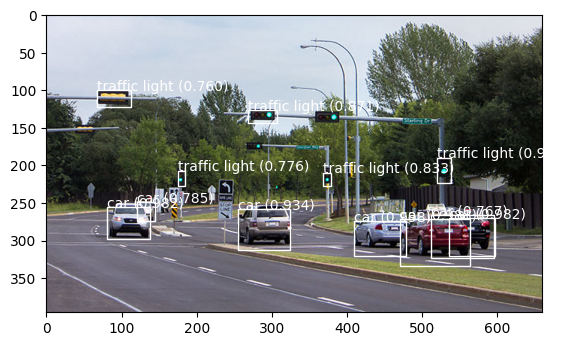

In [23]:
draw_boxes(photo_filename,final_data)

In [24]:
def yolo_non_max_suppression(scores, boxes, classes, max_boxes = 10, iou_threshold = 0.5):
    max_boxes_tensor = K.variable(max_boxes, dtype='int32')     # tensor to be used in tf.image.non_max_suppression()
    K.get_session().run(tf.variables_initializer([max_boxes_tensor])) # initialize variable max_boxes_tensor
    nms_indices = tf.image.non_max_suppression(scores=scores,boxes=boxes,max_output_size=max_boxes,iou_threshold=iou_threshold)

    scores = K.gather(scores,nms_indices)
    boxes = K.gather(boxes,nms_indices)
    classes = K.gather(classes,nms_indices)

    return scores, boxes, classes

In [27]:
def showresults(path):
    _image,width,height=load_and_preprocess_image(path,[IMAGE_WIDTH,IMAGE_HEIGHT])
    image = expand_dims(_image, 0)
    yhat = model.predict(image)
    boxes = list()
    for i in range(len(yhat)):
        boxes += decode_netout(yhat[i][0], anchors[i], net_h=IMAGE_HEIGHT, net_w=IMAGE_WIDTH)
    for i in range(len(boxes)):
        x_offset, x_scale = (IMAGE_WIDTH - IMAGE_WIDTH)/2./IMAGE_HEIGHT, float(IMAGE_WIDTH)/IMAGE_WIDTH
        y_offset, y_scale = (IMAGE_HEIGHT - IMAGE_HEIGHT)/2./IMAGE_HEIGHT, float(IMAGE_HEIGHT)/IMAGE_HEIGHT
        boxes[i].xmin = int((boxes[i].xmin - x_offset) / x_scale * image_w)
        boxes[i].xmax = int((boxes[i].xmax - x_offset) / x_scale * image_w)
        boxes[i].ymin = int((boxes[i].ymin - y_offset) / y_scale * image_h)
        boxes[i].ymax = int((boxes[i].ymax - y_offset) / y_scale * image_h)
    valid_data= box_filter(boxes, labels, threshold_socre=0.6)
    dic=encoder_dic(valid_data)
    final_data=do_nms(dic, 0.7)
    draw_boxes(path,final_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
zebra 0.998504 status: kept
zebra 0.9980972 status: removed
zebra 0.99749166 status: removed
zebra 0.99720347 status: removed
zebra 0.97361493 status: kept
zebra 0.96253264 status: kept
zebra 0.94921255 status: kept
zebra 0.94795895 status: removed
zebra 0.92289156 status: kept
zebra 0.88756216 status: removed
zebra 0.7587726 status: removed
zebra 0.7129493 status: removed
zebra 0.66869557 status: removed
zebra 0.998504
zebra 0.97361493
zebra 0.96253264
zebra 0.94921255
zebra 0.92289156


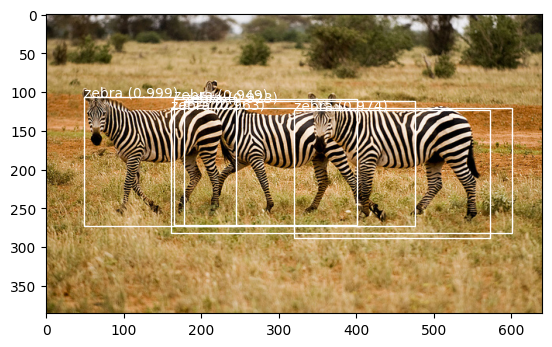

In [29]:
showresults('C:/Greg-Galvin-Unique-Faces-and-Object-Identification/Object_detection/images/zebra.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
horse 0.98793787 status: kept
horse 0.9690424 status: removed
horse 0.92200404 status: removed
horse 0.6804381 status: removed
horse 0.6258267 status: removed
zebra 0.9994484 status: kept
zebra 0.9978948 status: removed
zebra 0.9903752 status: removed
zebra 0.77296674 status: removed
zebra 0.63667 status: removed
horse 0.98793787
zebra 0.9994484


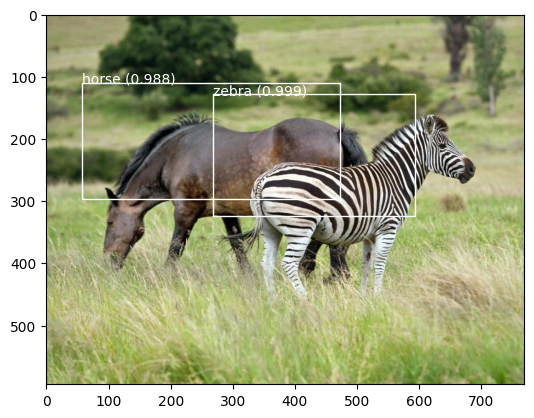

In [30]:
showresults('C:/Greg-Galvin-Unique-Faces-and-Object-Identification/Object_detection/images/zebra_horse.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
bicycle 0.9446473 status: kept
bicycle 0.8963139 status: removed
bicycle 0.8248692 status: removed
bicycle 0.8214878 status: removed
car 0.9975145 status: kept
car 0.99746543 status: removed
car 0.9875057 status: removed
car 0.9786205 status: removed
car 0.9115821 status: removed
car 0.88887185 status: removed
car 0.62539065 status: kept
person 0.99595857 status: kept
person 0.98552233 status: kept
person 0.95009744 status: removed
person 0.9180842 status: removed
person 0.8991508 status: kept
person 0.8983275 status: removed
person 0.89733076 status: removed
person 0.7545864 status: removed
person 0.6780588 status: kept
bicycle 0.9446473
car 0.9975145
car 0.62539065
person 0.99595857
person 0.98552233
person 0.8991508
person 0.6780588


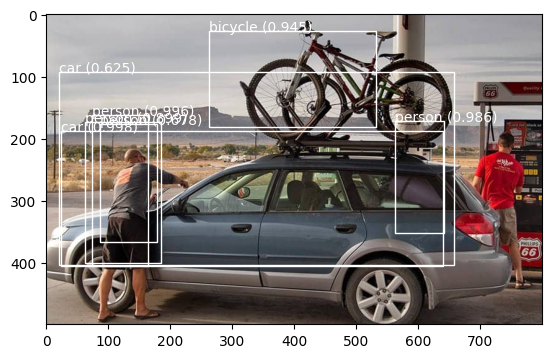

In [31]:
showresults('C:/Greg-Galvin-Unique-Faces-and-Object-Identification/Object_detection/images/01.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
person 0.9980522 status: kept
person 0.99664384 status: kept
person 0.99083817 status: kept
person 0.9842043 status: removed
person 0.9781336 status: removed
person 0.942179 status: removed
person 0.85916746 status: kept
person 0.8154628 status: removed
person 0.6561397 status: removed
sports ball 0.99958515 status: kept
sports ball 0.99935335 status: removed
sports ball 0.96443164 status: kept
sports ball 0.6212868 status: removed
person 0.9980522
person 0.99664384
person 0.99083817
person 0.85916746
sports ball 0.99958515
sports ball 0.96443164


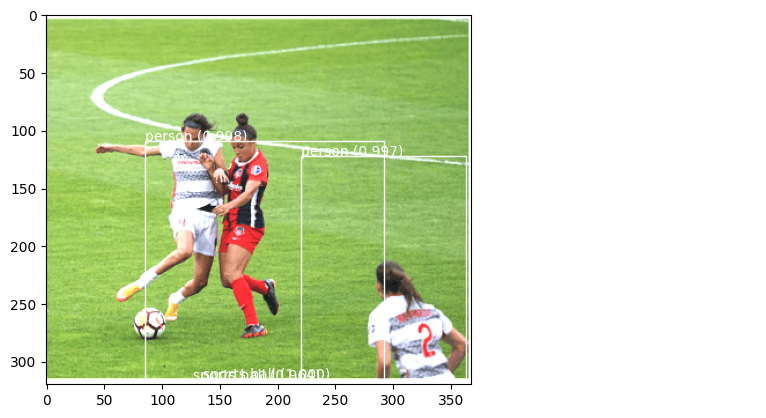

In [33]:
showresults('C:/Greg-Galvin-Unique-Faces-and-Object-Identification/Object_detection/images/02.png')